In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensortools as tt
%matplotlib inline

In [2]:
# ground truth model
N, R = 500, 3
factors = [np.random.rand(N, R) for _ in range(3)]

# noisy data
data = np.einsum('ir,jr,kr->ijk', *factors) # low-rank part
data += 0.1*np.random.randn(*data.shape) # add noise

In [3]:
fit_kw = {
    'ranks': range(1, 5),
    'replicates': 10,
    'nonneg': True,
    'method': 'randomized',
    'options': {
        'patience': 40, # controls number of iterations
        'tol': 1e-2,    # stopping criterion
        'polyak_averages': 100 # runs additional iterations and averages result
    }
}

In [4]:
results = tt.fit_ensemble(data, **fit_kw)
est_factors = tt.align_factors(results[R]['factors'][0], factors)[0]

Optimizing rank-1 models.
   10/10 converged, min error = 0.3107, max error = 0.3179, mean error = 0.3144, time to fit = 7.0490s
Optimizing rank-2 models.
   10/10 converged, min error = 0.2677, max error = 0.2712, mean error = 0.2699, time to fit = 12.8866s
Optimizing rank-3 models.
   10/10 converged, min error = 0.2131, max error = 0.2200, mean error = 0.2168, time to fit = 17.4389s
Optimizing rank-4 models.
   10/10 converged, min error = 0.2142, max error = 0.2166, mean error = 0.2156, time to fit = 23.3057s
Total time to fit models: 60.7003s


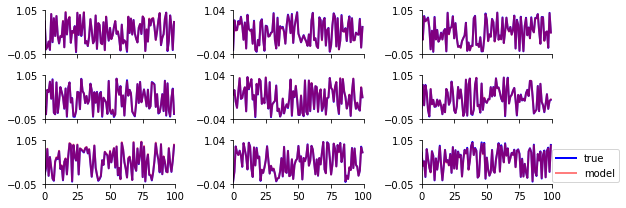

In [5]:
fig, axes, plot_obj = tt.plot_factors([f[:100] for f in factors], line_kw=dict(color='b', lw=2))
tt.plot_factors([f[:100] for f in est_factors], line_kw=dict(color='r', lw=2, alpha=0.5), fig=fig);
axes[-1,-1].legend(('true', 'model'), bbox_to_anchor=[0,0,1.55,0.9])

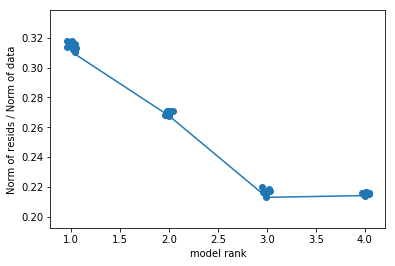

In [6]:
tt.plot_error(results)

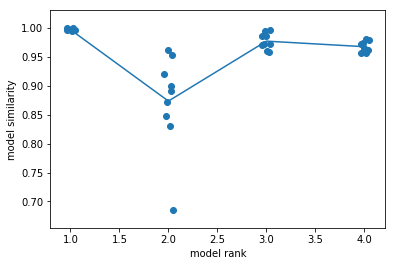

In [7]:
tt.plot_similarity(results)